# Exploration du dataset Sentiment140

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Chargement du dataset depuis le dossier data
df = pd.read_csv(
    "../data/sentiment140.csv",
    encoding="latin-1",
    header=None
)

# Attribution des noms de colonnes
df.columns = ["target", "id", "date", "flag", "user", "text"]

# Conversion des labels : 0 = négatif, 4 = positif → 0/1
df["target"] = df["target"].apply(lambda x: 1 if x == 4 else 0)

# Échantillonnage équilibré de 16 000 tweets
df_neg = df[df["target"] == 0].sample(8000, random_state=42)
df_pos = df[df["target"] == 1].sample(8000, random_state=42)
df_small = pd.concat([df_neg, df_pos]).sample(frac=1, random_state=42).reset_index(drop=True)

print("Taille du dataset réduit :", df_small.shape)
print(df_small["target"].value_counts())

# Découpage Train / Validation / Test
train_df, test_df = train_test_split(
    df_small, test_size=0.2, random_state=42, stratify=df_small["target"]
)

train_texts, val_texts, y_train, y_val = train_test_split(
    train_df["text"], train_df["target"], test_size=0.2, random_state=42, stratify=train_df["target"]
)

print("Train:", len(train_texts))
print("Validation:", len(val_texts))
print("Test:", len(test_df))

# Sauvegarde du dataset réduit pour réutilisation
df_small.to_csv("../data/sentiment140_light.csv", index=False, encoding="utf-8")
print("Fichier sentiment140_light.csv créé dans /data")


Taille du dataset réduit : (16000, 6)
target
1    8000
0    8000
Name: count, dtype: int64
Train: 10240
Validation: 2560
Test: 3200
Fichier sentiment140_light.csv créé dans /data


,target,id,date,flag,user,text
0,1,2007530999,Tue Jun 02 12:46:34 PDT 2009,NO_QUERY,Zensunni,@pbadstibner I have good balance..used to do m...
1,0,2053389416,Sat Jun 06 04:22:50 PDT 2009,NO_QUERY,nikki050572,@gtissa Still having issue and it's GDI!!! The...
2,0,2202299998,Tue Jun 16 21:33:49 PDT 2009,NO_QUERY,BigBossBeta,@Chrismorris528 Sigh. In 3 hours. It sucks to ...
3,0,2013656571,Tue Jun 02 23:13:29 PDT 2009,NO_QUERY,haushi87,@HelloEli exacly
4,1,1677310858,Sat May 02 01:26:00 PDT 2009,NO_QUERY,tristantales,In fairness. He smells good.



--- Informations générales ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  16000 non-null  int64 
 1   id      16000 non-null  int64 
 2   date    16000 non-null  object
 3   flag    16000 non-null  object
 4   user    16000 non-null  object
 5   text    16000 non-null  object
dtypes: int64(2), object(4)
memory usage: 750.1+ KB

--- Statistiques globales ---


,target,id,date,flag,user,text
count,16000.000000,1.600000e+04,16000,16000,16000,16000
unique,NaN,NaN,15832,1,15291,15987
top,NaN,NaN,Tue Jun 02 06:22:50 PDT 2009,NO_QUERY,lost_dog,isPlayer Has Died! Sorry
freq,NaN,NaN,2,16000,8,5
mean,0.500000,1.999674e+09,NaN,NaN,NaN,NaN
std,0.500016,1.943592e+08,NaN,NaN,NaN,NaN
min,0.000000,1.467816e+09,NaN,NaN,NaN,NaN
25%,0.000000,1.957240e+09,NaN,NaN,NaN,NaN
50%,0.500000,2.002712e+09,NaN,NaN,NaN,NaN
75%,1.000000,2.177771e+09,NaN,NaN,NaN,NaN



--- Valeurs manquantes ---
target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64


C:\Users\vicau\AppData\Local\Temp\ipykernel_5752\3988785873.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=df, palette="viridis")


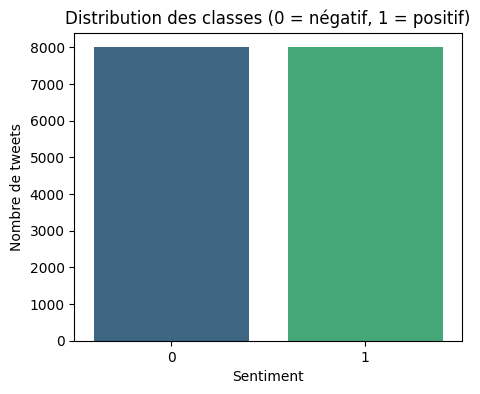

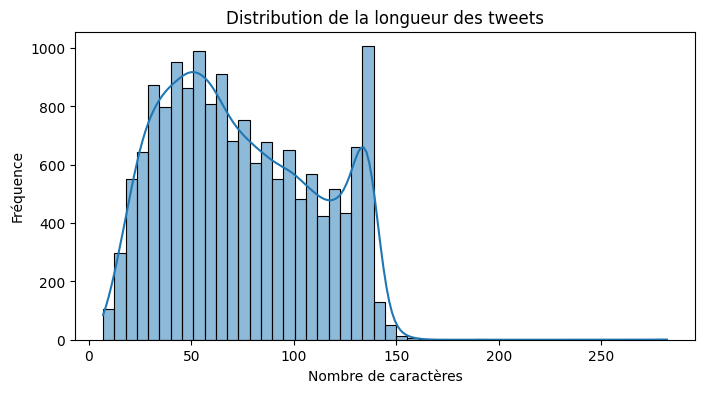


--- Longueurs moyennes des tweets ---
         count      mean        std  min   25%   50%    75%    max
target                                                            
0       8000.0  74.72975  36.817973  7.0  44.0  70.0  104.0  192.0
1       8000.0  73.59000  35.872350  8.0  44.0  68.0  102.0  282.0

--- Exemples de tweets négatifs ---


1    @gtissa Still having issue and it's GDI!!! The...
2    @Chrismorris528 Sigh. In 3 hours. It sucks to ...
3                                    @HelloEli exacly 
6              http://bit.ly/Wl9yL  i want to go here 
8    @TrueBunbarian I bet you are counting down. Ye...
Name: text, dtype: object


--- Exemples de tweets positifs ---


0    @pbadstibner I have good balance..used to do m...
4                        In fairness. He smells good. 
5    beats the heat with cool guava juice in handi ...
7    @YouHerevideo  I recommend Tweetdeck - you can...
9    @fattysammy Is perfectly cooked and delicious ...
Name: text, dtype: object

In [10]:
# Exploration rapide du dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement du dataset réduit
df = pd.read_csv("../data/sentiment140_light.csv", encoding="utf-8")

# Aperçu général
display(df.head())
print("\n--- Informations générales ---")
df.info()

print("\n--- Statistiques globales ---")
display(df.describe(include='all'))

# Vérification des valeurs manquantes
print("\n--- Valeurs manquantes ---")
print(df.isna().sum())

# Distribution de la variable cible
plt.figure(figsize=(5,4))
sns.countplot(x="target", data=df, palette="viridis")
plt.title("Distribution des classes (0 = négatif, 1 = positif)")
plt.xlabel("Sentiment")
plt.ylabel("Nombre de tweets")
plt.show()

# Longueur des tweets
df["text_length"] = df["text"].apply(len)

plt.figure(figsize=(8,4))
sns.histplot(df["text_length"], bins=50, kde=True)
plt.title("Distribution de la longueur des tweets")
plt.xlabel("Nombre de caractères")
plt.ylabel("Fréquence")
plt.show()

print("\n--- Longueurs moyennes des tweets ---")
print(df.groupby("target")["text_length"].describe())

# Exemple de tweets positifs et négatifs
print("\n--- Exemples de tweets négatifs ---")
display(df[df["target"] == 0]["text"].head(5))

print("\n--- Exemples de tweets positifs ---")
display(df[df["target"] == 1]["text"].head(5))


# Tests de plusieurs models 

## Préparation commune

In [11]:
# === Préparation commune ===
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le dataset réduit
df = pd.read_csv("../data/sentiment140_light.csv", encoding="utf-8")
X = df["text"]
y = df["target"]

# Split Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{title} - Matrice de confusion")
    plt.xlabel("Prédit")
    plt.ylabel("Réel")
    plt.show()


### 1. TF-IDF + Logistic Regression

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.72      0.71      0.72      1600
           1       0.72      0.73      0.72      1600

    accuracy                           0.72      3200
   macro avg       0.72      0.72      0.72      3200
weighted avg       0.72      0.72      0.72      3200

Accuracy: 0.719375
F1-score: 0.7212911235257604


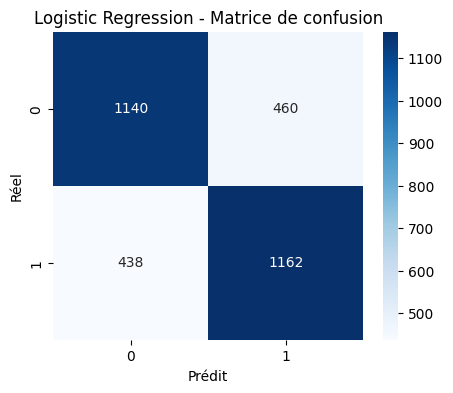

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf  = vectorizer.transform(X_test)

model_lr = LogisticRegression(max_iter=300)
model_lr.fit(X_train_tfidf, y_train)
y_pred_lr = model_lr.predict(X_test_tfidf)

print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr))

plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")


#### Cross-validation

In [20]:
# === Validation croisée : TF-IDF + Logistic Regression ===
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
import numpy as np

# Pipeline complet : TF-IDF → Logistic Regression
pipeline_lr = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000, stop_words="english")),
    ("clf", LogisticRegression(max_iter=300))
])

# Configuration de la validation croisée stratifiée (pour respecter l’équilibre des classes)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Évaluation F1-score (mesure adaptée aux classes équilibrées)
scores = cross_val_score(
    pipeline_lr,
    X_train,           # uniquement sur les données d'entraînement
    y_train,
    cv=cv,
    scoring="f1"
)

print("=== Validation croisée : Logistic Regression ===")
print(f"F1-score moyen : {scores.mean():.4f}")
print(f"Écart-type : {scores.std():.4f}")
print(f"Toutes les valeurs : {np.round(scores, 4)}")


=== Validation croisée : Logistic Regression ===
F1-score moyen : 0.7257
Écart-type : 0.0064
Toutes les valeurs : [0.7212 0.7358 0.7294 0.7245 0.7174]


### 2. TF-IDF + Random Forest

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.73      0.68      0.70      1600
           1       0.70      0.74      0.72      1600

    accuracy                           0.71      3200
   macro avg       0.71      0.71      0.71      3200
weighted avg       0.71      0.71      0.71      3200

Accuracy: 0.7121875
F1-score: 0.7208244922703849


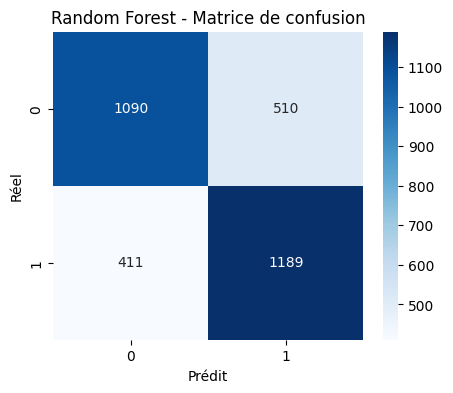

In [13]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=150, random_state=42)
model_rf.fit(X_train_tfidf, y_train)
y_pred_rf = model_rf.predict(X_test_tfidf)

print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))

plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")


#### Cross-validation

In [21]:
# === Validation croisée : TF-IDF + Random Forest ===
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Pipeline complet : TF-IDF → Random Forest
pipeline_rf = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000, stop_words="english")),
    ("clf", RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1))
])

# Validation croisée stratifiée à 5 folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Évaluation sur le F1-score
scores_rf = cross_val_score(
    pipeline_rf,
    X_train,
    y_train,
    cv=cv,
    scoring="f1"
)

print("=== Validation croisée : Random Forest ===")
print(f"F1-score moyen : {scores_rf.mean():.4f}")
print(f"Écart-type : {scores_rf.std():.4f}")
print(f"Toutes les valeurs : {np.round(scores_rf, 4)}")


=== Validation croisée : Random Forest ===
F1-score moyen : 0.7137
Écart-type : 0.0039
Toutes les valeurs : [0.7068 0.717  0.7131 0.7139 0.7179]


### 3. TF-IDF + Naive Bayes

=== Naive Bayes ===
              precision    recall  f1-score   support

           0       0.71      0.74      0.72      1600
           1       0.73      0.70      0.71      1600

    accuracy                           0.72      3200
   macro avg       0.72      0.72      0.72      3200
weighted avg       0.72      0.72      0.72      3200

Accuracy: 0.7184375
F1-score: 0.712782913611731


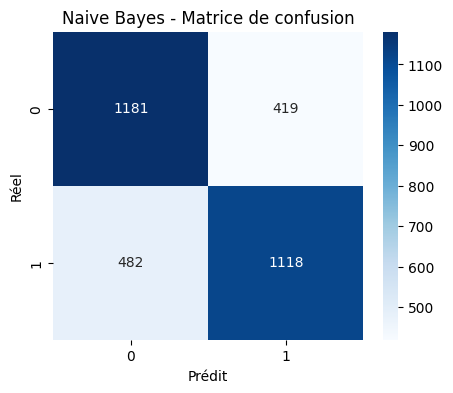

In [14]:
from sklearn.naive_bayes import MultinomialNB

model_nb = MultinomialNB()
model_nb.fit(X_train_tfidf, y_train)
y_pred_nb = model_nb.predict(X_test_tfidf)

print("=== Naive Bayes ===")
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("F1-score:", f1_score(y_test, y_pred_nb))

plot_confusion_matrix(y_test, y_pred_nb, "Naive Bayes")


### 4. Bag of Words + MLP

=== Bag of Words + MLP ===
              precision    recall  f1-score   support

           0       0.69      0.66      0.68      1600
           1       0.68      0.70      0.69      1600

    accuracy                           0.68      3200
   macro avg       0.68      0.68      0.68      3200
weighted avg       0.68      0.68      0.68      3200

Accuracy: 0.681875
F1-score: 0.6877300613496933


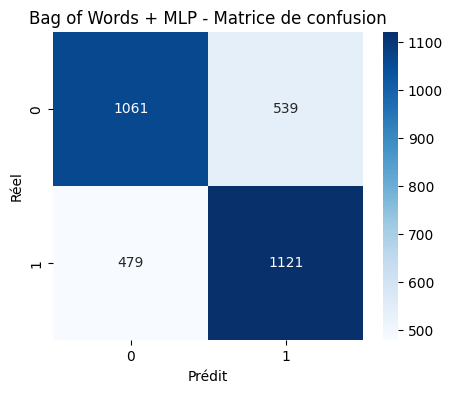

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Vectorisation bag-of-words
bow = CountVectorizer(max_features=5000, stop_words="english")
X_train_bow = bow.fit_transform(X_train).toarray()
X_test_bow  = bow.transform(X_test).toarray()

# Modèle MLP
mlp_bow = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
mlp_bow.fit(X_train_bow, y_train)
y_pred_bow = mlp_bow.predict(X_test_bow)

# Évaluation
print("=== Bag of Words + MLP ===")
print(classification_report(y_test, y_pred_bow))
print("Accuracy:", accuracy_score(y_test, y_pred_bow))
print("F1-score:", f1_score(y_test, y_pred_bow))

cm = confusion_matrix(y_test, y_pred_bow)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Bag of Words + MLP - Matrice de confusion")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()



### 5. Word2Vec + Logistic Regression

=== Word2Vec + Logistic Regression ===
              precision    recall  f1-score   support

           0       0.59      0.59      0.59      1600
           1       0.59      0.60      0.60      1600

    accuracy                           0.59      3200
   macro avg       0.59      0.59      0.59      3200
weighted avg       0.59      0.59      0.59      3200

Accuracy: 0.593125
F1-score: 0.5956521739130435


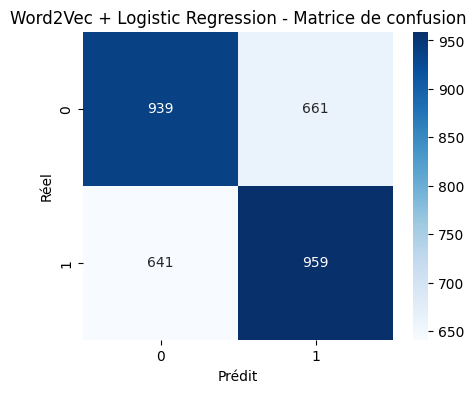

In [16]:
# === Word2Vec + Logistic Regression ===
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression

# Tokenisation simple
sentences = [text.split() for text in X_train]

# Entraînement du modèle Word2Vec
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)

# Fonction pour transformer un texte en vecteur moyen
import numpy as np

def vectorize_texts(texts, model, vector_size=100):
    vectors = []
    for text in texts:
        words = text.split()
        word_vecs = [model.wv[word] for word in words if word in model.wv]
        if len(word_vecs) > 0:
            vectors.append(np.mean(word_vecs, axis=0))
        else:
            vectors.append(np.zeros(vector_size))
    return np.array(vectors)

# Conversion des jeux de données
X_train_w2v = vectorize_texts(X_train, w2v_model)
X_test_w2v = vectorize_texts(X_test, w2v_model)

# Entraînement du modèle
model_w2v = LogisticRegression(max_iter=1000)
model_w2v.fit(X_train_w2v, y_train)
y_pred_w2v = model_w2v.predict(X_test_w2v)

# Évaluation
print("=== Word2Vec + Logistic Regression ===")
print(classification_report(y_test, y_pred_w2v))
print("Accuracy:", accuracy_score(y_test, y_pred_w2v))
print("F1-score:", f1_score(y_test, y_pred_w2v))

plot_confusion_matrix(y_test, y_pred_w2v, "Word2Vec + Logistic Regression")


### 6. FastText (avec la lib officielle de Meta)

=== FastText (lib officielle) ===
              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1600
           1       0.74      0.73      0.73      1600

    accuracy                           0.74      3200
   macro avg       0.74      0.74      0.74      3200
weighted avg       0.74      0.74      0.74      3200

Accuracy: 0.738125
F1-score: 0.7348101265822785


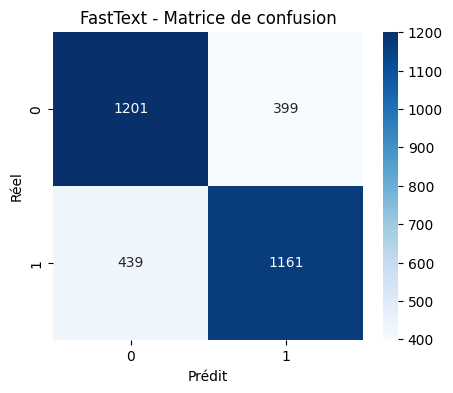

In [19]:
import fasttext
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Chargement du dataset
df = pd.read_csv("../data/sentiment140_light.csv", encoding="utf-8")

# Format FastText : __label__0 <texte> / __label__1 <texte>
df["ft_format"] = "__label__" + df["target"].astype(str) + " " + df["text"].astype(str)

# Split train / test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df["target"])

# Sauvegarde temporaire des fichiers pour FastText
train_df["ft_format"].to_csv("train_fasttext.txt", index=False, header=False)
test_df["ft_format"].to_csv("test_fasttext.txt", index=False, header=False)

# Entraînement du modèle FastText
model = fasttext.train_supervised(
    input="train_fasttext.txt",
    lr=0.1,
    epoch=10,
    wordNgrams=2,
    dim=100,
    verbose=2
)

# Évaluation sur le test
y_true = test_df["target"].tolist()
preds = [int(model.predict(text)[0][0].replace("__label__", "")) for text in test_df["text"]]

print("=== FastText (lib officielle) ===")
print(classification_report(y_true, preds))
print("Accuracy:", accuracy_score(y_true, preds))
print("F1-score:", f1_score(y_true, preds))

# Matrice de confusion
cm = confusion_matrix(y_true, preds)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("FastText - Matrice de confusion")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()


# Resultats des models test

**Tableau comparatif complet des modèles**

| **Modèle** | **Accuracy** | **F1-Score** | **Précision (0/1)** | **Rappel (0/1)** | **Vectorisation** | **Avantages** | **Inconvénients** |
|:--|:--:|:--:|:--:|:--:|:--|:--|:--|
| **FastText** | **73,81 %** | **73,48 %** | 0,73 / 0,74 | 0,75 / 0,73 | N-grams intégrés | Meilleure performance globale, prise en compte du contexte local | Nécessite un format spécifique des données |
| **TF-IDF + Logistic Regression** | 71,94 % | 72,13 % | 0,72 / 0,72 | 0,71 / 0,73 | TF-IDF | Simple, rapide, bonne performance | Ne capture pas le contexte sémantique |
| **TF-IDF + Naive Bayes** | 71,84 % | 71,28 % | 0,71 / 0,73 | 0,74 / 0,70 | TF-IDF | Simple, efficace avec peu de données | Hypothèse d’indépendance des features |
| **TF-IDF + Random Forest** | 71,22 % | 72,08 % | 0,73 / 0,70 | 0,68 / 0,74 | TF-IDF | Robuste, gère bien les non-linéarités | Plus lent, tendance au surapprentissage |
| **Bag of Words + MLP** | 68,19 % | 68,77 % | 0,69 / 0,68 | 0,66 / 0,70 | Bag of Words | Architecture neuronale flexible | Performance moyenne, plus complexe à optimiser |
| **Word2Vec + Logistic Regression** | 59,31 % | 59,57 % | 0,59 / 0,59 | 0,59 / 0,60 | Word2Vec | Capture la sémantique des mots | Performance faible, tokenisation simpliste |

---

**Analyse synthétique**

- **FastText** se démarque comme le modèle le plus performant.  
  Il combine rapidité, robustesse et une bonne prise en compte du contexte grâce aux n-grams.  
  Il constitue le **meilleur choix pour le prototype Air Paradis**.

- **TF-IDF + Logistic Regression** et **TF-IDF + Naive Bayes** forment d’excellentes **baselines** : simples, rapides, interprétables.  
  Idéales pour la reproductibilité et l’intégration MLOps.

- **Word2Vec** montre des performances inférieures, probablement dues à la moyenne des vecteurs qui perd la structure sémantique des phrases.  
  Un modèle pré-entraîné (comme GloVe ou BERT) améliorerait nettement les résultats.

---

**Résultats de la validation croisée**

| **Modèle** | **F1-score moyen (CV 5 folds)** | **Écart-type** | **Scores par fold** | **Analyse** |
|:--|:--:|:--:|:--|:--|
| **TF-IDF + Logistic Regression** | **0.7257** | 0.0064 | [0.7212, 0.7358, 0.7294, 0.7245, 0.7174] | Modèle linéaire stable, bonne généralisation, performances homogènes entre les folds. |
| **TF-IDF + Random Forest** | **0.7137** | 0.0039 | [0.7068, 0.7170, 0.7131, 0.7139, 0.7179] | Légèrement moins performant, mais très régulier. Montre une stabilité élevée et une bonne robustesse globale. |

**Interprétation :**  
La **régression logistique** conserve le meilleur F1-score moyen, indiquant un compromis optimal entre performance et simplicité.  
La **Random Forest** reste très stable mais légèrement en dessous, confirmant la robustesse du pipeline TF-IDF.  
Ces résultats consolident la **Logistic Regression** comme **baseline principale** à intégrer dans la suite du projet (suivi MLflow et déploiement API).
